Product with Highest Production Time:
Product Type       Medicine C
Production Time            12
Name: 2, dtype: object

Product with Highest Transportation Cost:
Product Type                 Vaccine D
Total Transportation Cost        990.0
Name: 3, dtype: object

Average Transportation Cost:  805.2


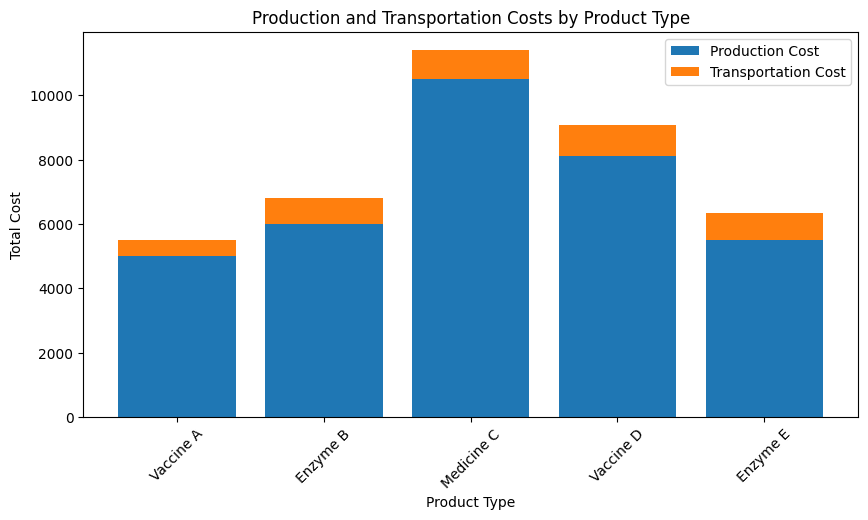

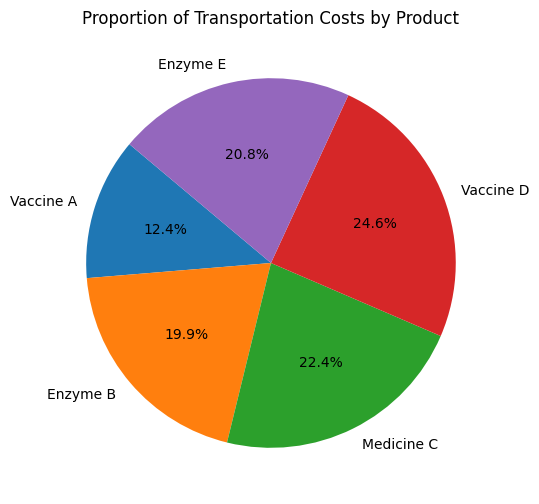

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_clean_data(filename):
    """Load supply chain data from a CSV file and handle missing values."""
    df = pd.read_csv(filename)
    df.dropna(inplace=True)  # Remove missing values
    return df

def calculate_costs_and_time(df):
    """Calculate total production and transportation costs and time for each product type."""
    df['Total Production Cost'] = df['Production Cost'] * df['Quantity']
    df['Total Transportation Cost'] = df['Transportation Cost'] * df['Quantity']
    df['Total Transportation Time'] = df['Transportation Time'] * df['Quantity']
    return df

def analyze_data(df):
    """Identify product with the highest cost and compute average transportation cost."""
    highest_production = df.loc[df['Production Time'].idxmax()]
    highest_transportation = df.loc[df['Total Transportation Cost'].idxmax()]
    avg_transport_cost = df['Total Transportation Cost'].mean()

    print("Product with Highest Production Time:")
    print(highest_production[['Product Type', 'Production Time']])
    print("\nProduct with Highest Transportation Cost:")
    print(highest_transportation[['Product Type', 'Total Transportation Cost']])
    print("\nAverage Transportation Cost: ", avg_transport_cost)

def visualize_data(df):
    """Generate bar and pie charts for cost analysis."""
    plt.figure(figsize=(10, 5))
    plt.bar(df['Product Type'], df['Total Production Cost'], label='Production Cost')
    plt.bar(df['Product Type'], df['Total Transportation Cost'], label='Transportation Cost', bottom=df['Total Production Cost'])
    plt.xlabel('Product Type')
    plt.ylabel('Total Cost')
    plt.title('Production and Transportation Costs by Product Type')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.pie(df['Total Transportation Cost'], labels=df['Product Type'], autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Transportation Costs by Product')
    plt.show()

def main():
    filename ='https://raw.githubusercontent.com/arefins-git/PP-02/refs/heads/main/supply%20chain%20data.csv'
    df = load_and_clean_data(filename)
    df = calculate_costs_and_time(df)
    analyze_data(df)
    visualize_data(df)

if __name__ == "__main__":
    main()
